In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler

In [2]:
data_train= pd.read_csv('./train.csv')

In [3]:
data_test= pd.read_csv('./test.csv')

In [4]:
data_train.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,7570
1,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,12128
2,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,2181
3,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,5946
4,Significant_Damage_And_Fatalities,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,9054


In [5]:
data_test.head()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,19.497717,16,6,72.151322,0.388959,78.32,4,37949.724386,2,0.069692,1
1,58.173516,15,3,64.585232,0.250841,78.60,7,30194.805567,2,0.002777,10
2,33.287671,15,3,64.721969,0.336669,86.96,6,17572.925484,1,0.004316,14
3,3.287671,21,5,66.362808,0.421775,80.86,3,40209.186341,2,0.199990,17
4,10.867580,18,2,56.107566,0.313228,79.22,2,35495.525408,2,0.483696,21


In [6]:
data_train.shape

(10000, 12)

In [7]:
data_test.shape

(2500, 11)

In [8]:
data_train1= data_train.copy()

In [9]:
data_test1= data_test.copy()

In [10]:
data_train= data_train.drop(["Accident_ID"],axis=1)

In [11]:
data_test= data_test.drop(["Accident_ID"],axis=1)

In [12]:
def inspect_data(data):
    return pd.DataFrame({"data_type":data.dtypes,"no.of levels":data.apply(lambda x: x.nunique(),axis=0),"Levels":data.apply(lambda x:str(x.unique()),axis=0),"nan":round((data.isnull().sum())/100,1)})
inspect_data(data_train)

,data_type,no.of levels,Levels,nan
Severity,object,4,['Minor_Damage_And_Injuries' 'Significant_Dama...,0.0
Safety_Score,float64,1175,[49.2237442922374 62.4657534246575 63.05936073...,0.0
Days_Since_Inspection,int64,23,[14 10 13 11 15 18 5 6 12 7 8 17 9 16 20 19 21...,0.0
Total_Safety_Complaints,int64,44,[22 27 16 9 25 0 10 4 40 11 2 14 1 3 5 7 20 28...,0.0
Control_Metric,float64,952,[71.285323609845 72.2880583409298 66.362807657...,0.0
Turbulence_In_gforces,float64,1117,[0.272117562206996 0.42393869455463395 0.32260...,0.0
Cabin_Temperature,float64,950,[78.04 84.54 78.86 81.79 77.16 78.63 88.04 83....,0.0
Accident_Type_Code,int64,7,[2 7 3 4 1 6 5],0.0
Max_Elevation,float64,4191,[31335.4768243775 26024.711057085402 39269.053...,0.0
Violations,int64,6,[3 2 1 0 4 5],0.0


In [13]:
inspect_data(data_test)

,data_type,no.of levels,Levels,nan
Safety_Score,float64,910,[ 19.49771689 58.17351598 33.28767123 3.28...,0.0
Days_Since_Inspection,int64,23,[16. 15. 21. 18. 8. 13. 17. 20. 11. 10. 7. 1...,0.0
Total_Safety_Complaints,int64,42,[ 6. 3. 5. 2. 14. 13. 0. 4. 7. 9. 22. ...,0.0
Control_Metric,float64,772,[72.15132179 64.58523245 64.72196901 66.362807...,0.0
Turbulence_In_gforces,float64,873,[0.38895853 0.25084097 0.33666859 0.42177497 0...,0.0
Cabin_Temperature,float64,764,[78.32 78.6 86.96 80.86 79.22 77.08 88.48 80....,0.0
Accident_Type_Code,int64,7,[4. 7. 6. 3. 2. 5. 1.],0.0
Max_Elevation,float64,1922,[37949.72438618 30194.80556735 17572.92548391 ...,0.0
Violations,int64,6,[2. 1. 3. 4. 0. 5.],0.0
Adverse_Weather_Metric,float64,1958,[0.06969245 0.0027774 0.00431639 ... 0.008628...,0.0


In [14]:
data_train.Severity.value_counts()

Highly_Fatal_And_Damaging                  3049
Significant_Damage_And_Serious_Injuries    2729
Minor_Damage_And_Injuries                  2527
Significant_Damage_And_Fatalities          1695
Name: Severity, dtype: int64

In [15]:
from sklearn.preprocessing import LabelEncoder
label_encoder= LabelEncoder()
data_train['Severity']= label_encoder.fit_transform(data_train['Severity'])

In [16]:
data_train.describe()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000
mean,1.410400,41.876406,12.931100,6.564300,65.145324,0.381495,79.969331,3.814900,32001.803282,2.01220,0.255635
std,1.182249,16.138072,3.539803,6.971982,11.882934,0.121301,2.759739,1.902577,9431.995196,1.03998,0.381128
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.134000,74.740000,1.000000,831.695553,0.00000,0.000316
25%,0.000000,30.593607,11.000000,2.000000,56.927985,0.293665,77.960000,2.000000,25757.636908,1.00000,0.012063
50%,1.000000,41.278539,13.000000,4.000000,65.587967,0.365879,79.540000,4.000000,32060.336419,2.00000,0.074467
75%,3.000000,52.511416,15.000000,9.000000,73.336372,0.451346,81.560000,5.000000,38380.641513,3.00000,0.354059
max,3.000000,100.000000,23.000000,54.000000,100.000000,0.882648,97.510000,7.000000,64297.651218,5.00000,2.365378


In [17]:
data_train.Total_Safety_Complaints.max()

54

In [18]:
data_train.Total_Safety_Complaints.min()

0

In [19]:
cat_cols= ['Severity','Accident_Type_Code','Violations']
num_cols= data_train.columns.difference(cat_cols)
num_cols

Index(['Adverse_Weather_Metric', 'Cabin_Temperature', 'Control_Metric',
       'Days_Since_Inspection', 'Max_Elevation', 'Safety_Score',
       'Total_Safety_Complaints', 'Turbulence_In_gforces'],
      dtype='object')

In [20]:
cat_cols_test= ['Accident_Type_Code','Violations']
num_cols_test= data_test.columns.difference(cat_cols_test)


In [21]:
data_train[cat_cols]= data_train[cat_cols].astype('category')
data_train[num_cols]= data_train[num_cols].astype('float')
data_train.dtypes

Severity                   category
Safety_Score                float64
Days_Since_Inspection       float64
Total_Safety_Complaints     float64
Control_Metric              float64
Turbulence_In_gforces       float64
Cabin_Temperature           float64
Accident_Type_Code         category
Max_Elevation               float64
Violations                 category
Adverse_Weather_Metric      float64
dtype: object

In [22]:
data_test[cat_cols_test]= data_test[cat_cols_test].astype('category')
data_test[num_cols_test]= data_test[num_cols_test].astype('float')
data_test.dtypes

Safety_Score                float64
Days_Since_Inspection       float64
Total_Safety_Complaints     float64
Control_Metric              float64
Turbulence_In_gforces       float64
Cabin_Temperature           float64
Accident_Type_Code         category
Max_Elevation               float64
Violations                 category
Adverse_Weather_Metric      float64
dtype: object

In [23]:
data_train.drop_duplicates()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric
0,1,49.223744,14.0,22.0,71.285324,0.272118,78.04,2,31335.476824,3,0.424352
1,1,62.465753,10.0,27.0,72.288058,0.423939,84.54,2,26024.711057,2,0.352350
2,2,63.059361,13.0,16.0,66.362808,0.322604,78.86,7,39269.053927,3,0.003364
3,3,48.082192,11.0,9.0,74.703737,0.337029,81.79,3,42771.499200,1,0.211728
4,2,26.484018,13.0,25.0,47.948952,0.541140,77.16,3,35509.228515,2,0.176883
...,...,...,...,...,...,...,...,...,...,...,...
9995,3,56.118721,8.0,1.0,63.445761,0.482359,78.64,5,38537.363408,2,0.026150
9996,0,40.365297,10.0,7.0,62.169553,0.421775,79.77,4,40846.916900,2,0.074898
9997,3,27.853881,17.0,1.0,69.598906,0.318277,80.37,3,33771.996300,3,0.168173
9998,1,56.210046,8.0,0.0,39.835916,0.598118,76.92,5,39820.419251,2,0.026381


In [24]:
data_test.drop_duplicates()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric
0,19.497717,16.0,6.0,72.151322,0.388959,78.32,4,37949.724386,2,0.069692
1,58.173516,15.0,3.0,64.585232,0.250841,78.60,7,30194.805567,2,0.002777
2,33.287671,15.0,3.0,64.721969,0.336669,86.96,6,17572.925484,1,0.004316
3,3.287671,21.0,5.0,66.362808,0.421775,80.86,3,40209.186341,2,0.199990
4,10.867580,18.0,2.0,56.107566,0.313228,79.22,2,35495.525408,2,0.483696
...,...,...,...,...,...,...,...,...,...,...
2495,68.127854,8.0,11.0,49.680948,0.470819,77.80,2,48251.586622,2,0.659387
2496,54.840183,9.0,9.0,71.194166,0.417087,79.77,6,20761.984416,1,0.005010
2497,36.712329,14.0,10.0,91.203282,0.313950,83.96,6,36676.100601,2,0.008629
2498,38.721461,13.0,14.0,73.154057,0.275003,77.38,6,24211.359510,1,0.006247


In [25]:
num_data= data_train.loc[:,num_cols]
cat_data= data_train.loc[:,cat_cols]

In [26]:
num_data_test= data_test.loc[:,num_cols_test]
cat_data_test= data_test.loc[:,cat_cols_test]

In [27]:
cat_data = pd.get_dummies(cat_data,columns=['Accident_Type_Code','Violations'],drop_first=True)

In [28]:
cat_data_test = pd.get_dummies(cat_data_test,columns=['Accident_Type_Code','Violations'],drop_first=True)

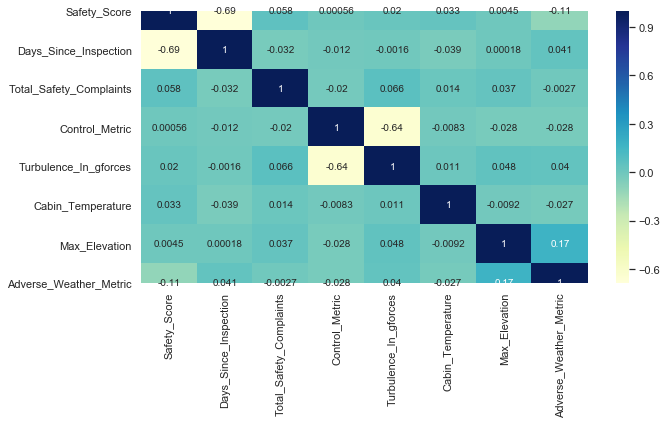

In [29]:
temp1= data_train.corr()
fig = plt.figure(figsize=(10,5))
sns.heatmap(temp1,cmap= 'YlGnBu',annot= True)

In [30]:
data_train= pd.concat([num_data,cat_data],axis=1)

In [31]:
data_test= pd.concat([num_data_test,cat_data_test],axis=1)

In [32]:
x = data_train.drop(["Severity"],axis=1)
y = data_train["Severity"]

In [33]:
x_train,x_validation,y_train,y_validation= train_test_split(x,y,test_size=0.25,random_state=12)

In [34]:
print(x_train.shape)
print(x_validation.shape)
print(y_train.shape)
print(y_validation.shape)
print(data_test.shape)

(7500, 19)
(2500, 19)
(7500,)
(2500,)
(2500, 19)


In [35]:
#standardizer= StandardScaler()
#standardizer.fit_transform(x_train)

In [36]:
#standardizer.transform(x_validation)
#standardizer.transform(data_test)

In [37]:
from sklearn.linear_model import LogisticRegression


In [38]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred_valid1 = logreg.predict(x_validation)
y_pred_train1= logreg.predict(x_train)

C:\Users\manis\Anaconda3\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [39]:
from sklearn.metrics import f1_score
from sklearn import metrics

In [40]:
print(metrics.f1_score(y_train, y_pred_train1,average= 'weighted'))
print(metrics.f1_score(y_validation, y_pred_valid1,average= 'weighted'))

0.40738008945532067
0.4014806144377659


In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
decision = DecisionTreeClassifier(max_depth=8,max_features='log2',class_weight='balanced',random_state=1,min_samples_split=5,splitter='random')
decision.fit(x_train, y_train)
y_pred_valid2 = decision.predict(x_validation)
y_pred_train2= decision.predict(x_train)

In [43]:
print(metrics.f1_score(y_train, y_pred_train2,average= 'weighted'))
print(metrics.f1_score(y_validation, y_pred_valid2,average= 'weighted'))

0.5723967757908938
0.5598207569308031


In [44]:
y_test2= decision.predict(data_test)

In [45]:
y_test2

array([0, 2, 3, ..., 3, 3, 1], dtype=int64)

In [46]:
submission= data_test1[['Accident_ID']]

In [47]:
submission.head()

,Accident_ID
0,1
1,10
2,14
3,17
4,21


In [48]:
sub1= pd.DataFrame()
sub1= submission


In [49]:
sub1["Severity"]= pd.Series(y_test2).map({0:'Highly_Fatal_And_Damaging',1:'Minor_Damage_And_Injuries',2:'Significant_Damage_And_Fatalities',3:'Significant_Damage_And_Serious_Injuries'})

C:\Users\manis\Anaconda3\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [50]:
sub1.shape

(2500, 2)

In [51]:
sub1.to_csv('sub1.csv',index= False)

In [52]:
sub1.Severity.value_counts()

Highly_Fatal_And_Damaging                  877
Significant_Damage_And_Serious_Injuries    670
Minor_Damage_And_Injuries                  604
Significant_Damage_And_Fatalities          349
Name: Severity, dtype: int64

In [53]:
sub1.head()

,Accident_ID,Severity
0,1,Highly_Fatal_And_Damaging
1,10,Significant_Damage_And_Fatalities
2,14,Significant_Damage_And_Serious_Injuries
3,17,Significant_Damage_And_Serious_Injuries
4,21,Highly_Fatal_And_Damaging


In [224]:
from xgboost import XGBClassifier

In [246]:
xgbc= XGBClassifier(learning_rate=0.01,n_estimators=50,max_depth=12,booster='dart',objective='multi:softmax',nthread=3)

In [247]:
xgbc.fit(x_train, y_train)
y_pred_valid3 = xgbc.predict(x_validation)
y_pred_train3= xgbc.predict(x_train)

In [248]:
print(metrics.f1_score(y_train, y_pred_train3,average= 'weighted'))
print(metrics.f1_score(y_validation, y_pred_valid3,average= 'weighted'))

0.9838737898679656
0.9328764312393488


In [249]:
from mlxtend.plotting import plot_learning_curves

([0.021333333333333333,
  0.016666666666666666,
  0.011111111111111112,
  0.01633333333333333,
  0.013333333333333334,
  0.015111111111111112,
  0.01561904761904762,
  0.014666666666666666,
  0.016444444444444446,
  0.016133333333333333],
 [0.2128,
  0.1536,
  0.1128,
  0.1072,
  0.0892,
  0.0796,
  0.0748,
  0.0736,
  0.068,
  0.0672])

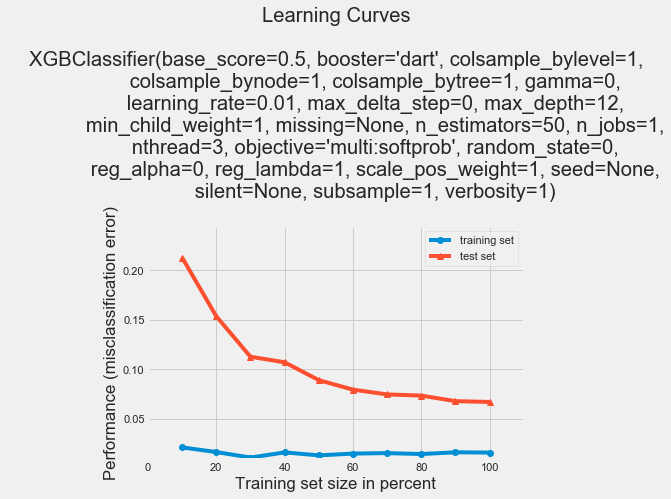

In [250]:
plot_learning_curves(x_train,y_train,x_validation,y_validation,xgbc)

In [ ]:
y_test3= xgbc.predict(data_test)

In [173]:
submission= data_test1[['Accident_ID']]

In [174]:
sub2= pd.DataFrame()
sub2= submission

In [175]:
sub2["Severity"]= pd.Series(y_test3).map({0:'Highly_Fatal_And_Damaging',1:'Minor_Damage_And_Injuries',2:'Significant_Damage_And_Fatalities',3:'Significant_Damage_And_Serious_Injuries'})

C:\Users\manis\Anaconda3\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [176]:
sub2.shape

(2500, 2)

In [177]:
sub2.to_csv('sub2.csv',index= False)

In [178]:
sub2.Severity.value_counts()

Highly_Fatal_And_Damaging                  768
Minor_Damage_And_Injuries                  682
Significant_Damage_And_Serious_Injuries    648
Significant_Damage_And_Fatalities          402
Name: Severity, dtype: int64

In [128]:
from keras.models import Sequential
from keras.layers import Dense

from keras.wrappers.scikit_learn import KerasClassifier

from sklearn.model_selection import GridSearchCV

In [218]:
model = Sequential()
model.add(Dense(10, input_dim=19, activation='relu'))
model.add(Dense(4,activation= 'softmax'))
    
    # Compile model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    

In [219]:
model.fit(x_train, y_train, epochs=100,batch_size=50)


Epoch 1/100
7500/7500 [==============================] - 2s 327us/step - loss: 4222.3358 - accuracy: 0.2565
Epoch 2/100
7500/7500 [==============================] - 0s 45us/step - loss: 21.7440 - accuracy: 0.2589
Epoch 3/100
7500/7500 [==============================] - ETA: 0s - loss: 19.8496 - accuracy: 0.275 - 0s 46us/step - loss: 20.0844 - accuracy: 0.2745
Epoch 4/100
7500/7500 [==============================] - 0s 45us/step - loss: 15.0299 - accuracy: 0.2693
Epoch 5/100
7500/7500 [==============================] - 0s 45us/step - loss: 20.6519 - accuracy: 0.2656
Epoch 6/100
7500/7500 [==============================] - 0s 44us/step - loss: 13.1101 - accuracy: 0.2840
Epoch 7/100
7500/7500 [==============================] - 0s 45us/step - loss: 19.3110 - accuracy: 0.2747
Epoch 8/100
7500/7500 [==============================] - 0s 49us/step - loss: 17.5987 - accuracy: 0.29000s - loss: 14.1454 - accuracy:
Epoch 9/100
7500/7500 [==============================] - 0s 45us/step - loss: 14.01

7500/7500 [==============================] - 0s 45us/step - loss: 9.4115 - accuracy: 0.3805
Epoch 78/100
7500/7500 [==============================] - 0s 46us/step - loss: 11.6193 - accuracy: 0.3760
Epoch 79/100
7500/7500 [==============================] - 0s 44us/step - loss: 5.2056 - accuracy: 0.4629
Epoch 80/100
7500/7500 [==============================] - 0s 44us/step - loss: 7.0109 - accuracy: 0.4120
Epoch 81/100
7500/7500 [==============================] - 0s 44us/step - loss: 9.0169 - accuracy: 0.4004
Epoch 82/100
7500/7500 [==============================] - 0s 45us/step - loss: 7.1828 - accuracy: 0.4345
Epoch 83/100
7500/7500 [==============================] - 0s 45us/step - loss: 6.7110 - accuracy: 0.4447
Epoch 84/100
7500/7500 [==============================] - 0s 45us/step - loss: 6.4386 - accuracy: 0.4333
Epoch 85/100
7500/7500 [==============================] - 0s 45us/step - loss: 8.4165 - accuracy: 0.4163
Epoch 86/100
7500/7500 [==============================] - 0s 44us/s

batch_size = list(range(5,50,5))
epochs = list(range(10,100,10))

param_grid = dict(batch_size=batch_size, epochs=epochs)

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1,cv=8)

grid_result = grid.fit(x_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


In [220]:
y_pred_train3= model.predict(x_train)
y_pred_val3= model.predict(x_validation)

In [221]:
print(metrics.accuracy_score(y_train, y_pred_train3))
print(metrics.accuracy_score(y_validation, y_pred_val3))

ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets